In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.utils import to_categorical

/home/minesh/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
from keras.layers import *
from keras.models import *

In [4]:
np.random.seed(0)

In [5]:
X = np.load("../X.npy") 
y = np.load("../Y.npy")

In [6]:
(X.shape,y.shape)

((5547, 50, 50, 3), (5547,))

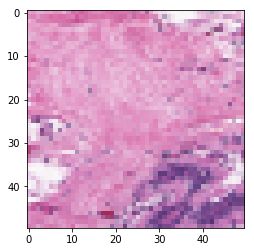

In [7]:
plt.imshow(X[0])

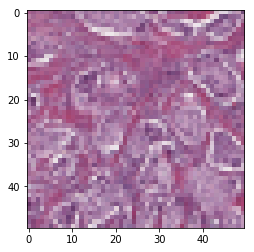

In [8]:
plt.imshow(X[-1])

In [29]:
def get_model():
    inp = Input(shape=(50,50,3))
    # ver2.
    x = BatchNormalization()(inp)
    # number of filters =64 and filter size = 3
    x = Conv2D(filters= 64, kernel_size= 3, activation="relu")(x) 
    x = Conv2D(filters= 4, kernel_size= 3, activation="relu")(x)
    x = Dropout(0.5)(x)
    #x = MaxPool2D(pool_size=2)(x)
    #x = Conv2D(filters= 64, kernel_size= 3, activation="relu")(x) 
    #x = Conv2D(filters= 64, kernel_size= 3, activation="relu")(x)
    #x = Dropout(0.5)(x)
    #x = MaxPool2D(pool_size=2)(x)
    x = Flatten()(x)
    x = Dense(2,activation="softmax")(x) # use one for sigmoid
    model = Model(inp,x)
    model.summary()
    model.compile(loss="categorical_crossentropy", optimizer="adam",metrics=["accuracy"]) # binary cross entropy while using one output
    return model

model = get_model()    
    

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, 50, 50, 3)         0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 50, 50, 3)         12        
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 48, 48, 64)        1792      
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 46, 46, 4)         2308      
_________________________________________________________________
dropout_12 (Dropout)         (None, 46, 46, 4)         0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 8464)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 16930     
Total para

In [1]:
#model.fit(X,to_categorical(y)
#          ,validation_split=0.2 # better to use K fold ?
          # if we keep static val_set
           # pros. useful to compare importance for weights between models
           # cons. overfitting
          # 
#          ,batch_size=32 # if use high size of batch, increase learning rate, need more RAM, may miss few samples as it is being less variable(insence of bias-variance)
#          ,epochs=3) # increase for underfitted model

In [2]:
from keras.callbacks import *

/home/minesh/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
import tensorflow as tf
#https://stackoverflow.com/questions/47877475/keras-tensorboard-plot-train-and-validation-scalars-in-a-same-figure?rq=1
class TrainValTensorBoard(TensorBoard):
    def __init__(self, log_dir='./logs', **kwargs):
        # Make the original `TensorBoard` log to a subdirectory 'training'
        training_log_dir = os.path.join(log_dir, 'training')
        super(TrainValTensorBoard, self).__init__(training_log_dir, **kwargs)

        # Log the validation metrics to a separate subdirectory
        self.val_log_dir = os.path.join(log_dir, 'validation')

    def set_model(self, model):
        # Setup writer for validation metrics
        self.val_writer = tf.summary.FileWriter(self.val_log_dir)
        super(TrainValTensorBoard, self).set_model(model)

    def on_epoch_end(self, epoch, logs=None):
        # Pop the validation logs and handle them separately with
        # `self.val_writer`. Also rename the keys so that they can
        # be plotted on the same figure with the training metrics
        logs = logs or {}
        val_logs = {k.replace('val_', ''): v for k, v in logs.items() if k.startswith('val_')}
        for name, value in val_logs.items():
            summary = tf.Summary()
            summary_value = summary.value.add()
            summary_value.simple_value = value.item()
            summary_value.tag = name
            self.val_writer.add_summary(summary, epoch)
        self.val_writer.flush()

        # Pass the remaining logs to `TensorBoard.on_epoch_end`
        logs = {k: v for k, v in logs.items() if not k.startswith('val_')}
        super(TrainValTensorBoard, self).on_epoch_end(epoch, logs)

    def on_train_end(self, logs=None):
        super(TrainValTensorBoard, self).on_train_end(logs)
        self.val_writer.close()

In [4]:
def on_epoch_end(self, epoch, logs=None):
    print(K.eval(self.model.optimizer.lr))

In [5]:
es = EarlyStopping(min_delta=0.01,patience=5,verbose=2)
cp = ModelCheckpoint("bst_model_wts",save_best_only=True)
rlop = ReduceLROnPlateau(patience=5,factor=0.3)
tb = TensorBoard(write_grads=True)

model = get_model()
np.random.seed(0)
model.fit(X,to_categorical(y),validation_split=0.2
          ,batch_size=62,epochs=130
          ,callbacks=[es,cp,TrainValTensorBoard(write_graph=False,write_grads=True)])

NameError: name 'get_model' is not defined

In [44]:
!rm -vrf ./logs/